<a href="https://colab.research.google.com/github/badri0843/CODSOFT/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK -  3

IRIS FLOWER CLASSIFICATION

In [1]:
#import library
import numpy as np

import pandas as pd

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

In [4]:
df = sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df['species'], categories = pd.factorize(df['species'])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [9]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

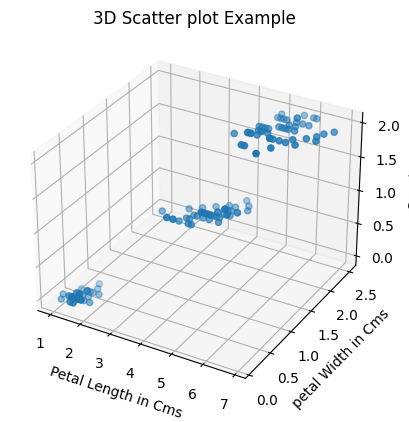

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(df.petal_length, df.petal_width, df.species)
ax.set_xlabel('Petal Length in Cms')
ax.set_ylabel('petal Width in Cms')
ax.set_zlabel('Species')
plt.title('3D Scatter plot Example')
plt.show()

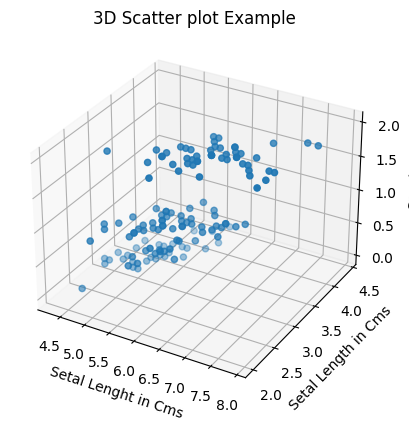

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df.sepal_length,df.sepal_width,df.species)
ax.set_xlabel('Setal Lenght in Cms')
ax.set_ylabel('Setal Length in Cms')
ax.set_zlabel('Species')
plt.title('3D Scatter plot Example')
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

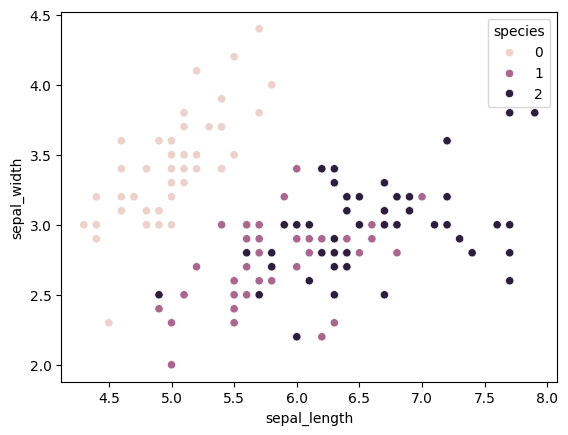

In [12]:
#this 3d plot gives us glimplse of species of iris flower is more inclined towards the variable petal length and petal width
sns.scatterplot(data = df, x = 'sepal_length', y = 'sepal_width', hue = 'species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

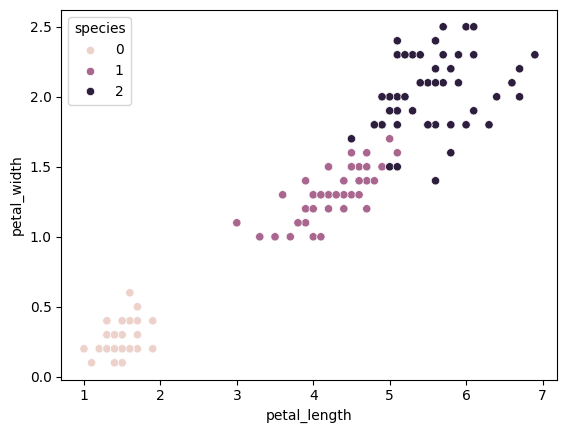

In [13]:
sns.scatterplot(data = df, x = 'petal_length', y = 'petal_width', hue = 'species')

In [14]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(df[['petal_length','petal_width']])
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [15]:
sse

[550.8953333333334,
 86.39021984551397,
 31.37135897435897,
 19.48300089968511,
 13.916908757908757,
 11.068093852329548,
 9.260360624882363,
 7.624193062579724,
 6.576538396386222]

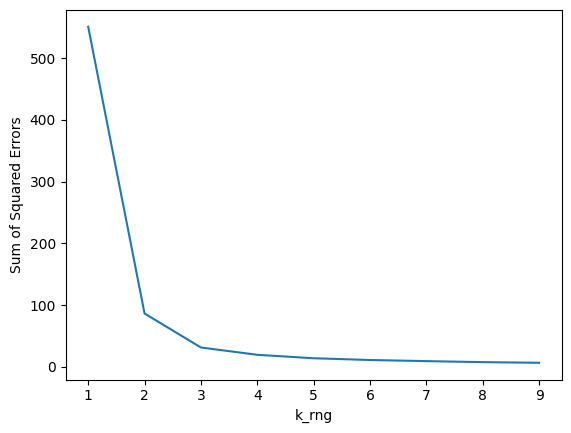

In [16]:
plt.xlabel('k_rng')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng,sse)

In [17]:
#applying KMeans alogrithm
km = KMeans(n_clusters = 3, random_state = 0)
y_predicted = km.fit_predict(df[['petal_length','petal_width']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [18]:
df['cluster'] = y_predicted
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [19]:
#acurracy measure
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df.species, df.cluster)
cm

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 46,  4]])

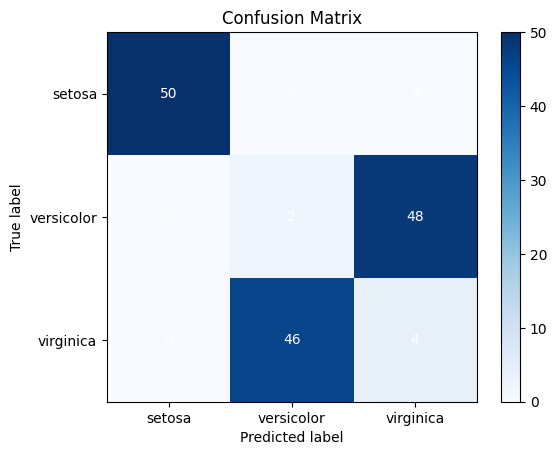

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

true_labels = df.species
predicted_labels = df.cluster

cm = confusion_matrix(true_labels, predicted_labels)

class_labels = ['setosa', 'versicolor', 'virginica']

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [25]:
x = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df[['species']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [26]:
x_train,x_test,y_train,y_test

(     sepal_length  sepal_width  petal_length  petal_width
 22            4.6          3.6           1.0          0.2
 15            5.7          4.4           1.5          0.4
 65            6.7          3.1           4.4          1.4
 11            4.8          3.4           1.6          0.2
 42            4.4          3.2           1.3          0.2
 ..            ...          ...           ...          ...
 71            6.1          2.8           4.0          1.3
 106           4.9          2.5           4.5          1.7
 14            5.8          4.0           1.2          0.2
 92            5.8          2.6           4.0          1.2
 102           7.1          3.0           5.9          2.1
 
 [120 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 73            6.1          2.8           4.7          1.2
 18            5.7          3.8           1.7          0.3
 118           7.7          2.6           6.9          2.3
 78            6.0          2

In [27]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
x_train_scaled,x_test_scaled

(array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
        [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
        [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
        [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
        [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282],
        [ 0.59831066, -1.25582892,  0.72969227,  0.95664273],
        [ 0.72020757,  0.30929911,  0.44316389,  0.4227026 ],
        [-0.74255534,  0.98006827, -1.27600637, -1.31260282],
        [-0.98634915,  1.20365799, -1.33331205, -1.31260282],
        [-0.74255534,  2.32160658, -1.27600637, -1.44608785],
        [-0.01117388, -0.80864948,  0.78699794,  0.95664273],
        [ 0.23261993,  0.75647855,  0.44316389,  0.55618763],
        [ 1.08589829,  0.08570939,  0.55777524,  0.4227026 ],
        [-0.49876152,  1.87442714, -1.39061772, -1.04563275],
        [-0.49876152,  1.4272477 , -1.27600637, -1.31260282],
        [-0.37686461, -1.47941864, -0.01528151, -0.24472256],
        

In [29]:
#knn classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [30]:
knn.fit(x_train_scaled, y_train)
#train model

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [31]:
y_pred = knn.predict(x_test_scaled)

In [32]:
species_names = df['species'].unique().astype(str).tolist()
report = classification_report(y_test, y_pred, target_names=species_names)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

